In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/airbnblistings/final.csv


**Airbnb listings offer a diverse range of accommodations to travelers worldwide. These listings, which can include apartments, houses, rooms, or even unique stays like treehouses or yachts, provide travelers with a wide array of choices to fit their preferences and budgets. On Airbnb, hosts list their properties, set prices, and provide detailed descriptions and images to attract guests.**

**🏠 Variety: This dataset encompasses a diverse array of Airbnb listings, from cozy apartments to spacious villas, ensuring options for every traveler's taste and budget.**

**💲 Pricing: On average, the nightly prices for these listings are reasonable, ranging from budget-friendly options to more luxurious accommodations.**

**🌟 Guest Satisfaction: High average review scores and a substantial number of reviews suggest that guests have had enjoyable stays, often leaving positive feedback.**

**🛏️ Comfortable Sleep: With an average of multiple bedrooms and beds per listing, guests can expect a comfortable and restful night's sleep.**

**🚿 Convenience: The majority of listings offer private bathrooms, providing convenience and privacy for guests during their stays.**




In [4]:
df=pd.read_csv("/kaggle/input/airbnblistings/final.csv")

In [5]:
df

,id,name,city,review,review_count,guest,bedroom,bed,studio,private_bathroom,bathroom,home,flat,guest_house,hotel,price
0,41993887,Cool N Cosy 2 BR Aprtmnt-modern amenities & B/...,Varanasi,4.86,14,6,2,2,False,0,2.0,True,True,False,True,3200
1,446515,RAINFOREST HOUSE - RISHIKESH - ROOM 1,Rishikesh,4.73,33,2,1,1,False,1,0.0,True,False,False,False,3500
2,35260255,Beachwalk Bliss by Laze Around Us,Calangute,4.75,71,3,1,1,False,0,1.0,True,True,True,True,1546
3,40524398,Riviera Hermitage- 2bhk Pent house,Anjuna,4.95,22,5,2,5,False,0,2.0,True,True,False,False,4643
4,39607785,"NEW Abidal Resort, Colomb bay, Patnem beach #2",Canacona,4.78,41,2,1,1,False,0,1.0,True,True,False,True,4000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1966,48944355,VALLEYVIEW OPEN TERRACE WALKING DISTANCE MALL ...,Shimla,4.92,12,2,1,1,False,1,0.0,True,True,True,True,1443
1967,605798830704374593,Jannat,Mussoorie,4.50,6,10,3,3,False,0,3.0,True,True,True,True,12900
1968,48603451,"Pent house- Studio Cafe (1 room, kitchen, terr...",Dehradun,0.00,0,2,1,1,False,0,1.0,True,False,False,False,1450
1969,51612186,PEACEFUL1 BEDROOM RESEDENTIAL HOME IN BHIMTAL,Bhimtal,4.86,21,2,1,1,False,0,1.5,True,True,True,True,1200


In [6]:
#Head of the data
df.head(5)

,id,name,city,review,review_count,guest,bedroom,bed,studio,private_bathroom,bathroom,home,flat,guest_house,hotel,price
0,41993887,Cool N Cosy 2 BR Aprtmnt-modern amenities & B/...,Varanasi,4.86,14,6,2,2,False,0,2.0,True,True,False,True,3200
1,446515,RAINFOREST HOUSE - RISHIKESH - ROOM 1,Rishikesh,4.73,33,2,1,1,False,1,0.0,True,False,False,False,3500
2,35260255,Beachwalk Bliss by Laze Around Us,Calangute,4.75,71,3,1,1,False,0,1.0,True,True,True,True,1546
3,40524398,Riviera Hermitage- 2bhk Pent house,Anjuna,4.95,22,5,2,5,False,0,2.0,True,True,False,False,4643
4,39607785,"NEW Abidal Resort, Colomb bay, Patnem beach #2",Canacona,4.78,41,2,1,1,False,0,1.0,True,True,False,True,4000


In [7]:
#Bottom of the data
df.tail(5)

,id,name,city,review,review_count,guest,bedroom,bed,studio,private_bathroom,bathroom,home,flat,guest_house,hotel,price
1966,48944355,VALLEYVIEW OPEN TERRACE WALKING DISTANCE MALL ...,Shimla,4.92,12,2,1,1,False,1,0.0,True,True,True,True,1443
1967,605798830704374593,Jannat,Mussoorie,4.50,6,10,3,3,False,0,3.0,True,True,True,True,12900
1968,48603451,"Pent house- Studio Cafe (1 room, kitchen, terr...",Dehradun,0.00,0,2,1,1,False,0,1.0,True,False,False,False,1450
1969,51612186,PEACEFUL1 BEDROOM RESEDENTIAL HOME IN BHIMTAL,Bhimtal,4.86,21,2,1,1,False,0,1.5,True,True,True,True,1200
1970,547726199256954377,Swiss Home near River Ganges,Haridwar,4.57,7,4,2,2,False,0,1.0,True,True,True,True,1800


In [8]:
#Shape of the data
df.shape

(1971, 16)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971 entries, 0 to 1970
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1971 non-null   int64  
 1   name              1971 non-null   object 
 2   city              1971 non-null   object 
 3   review            1971 non-null   float64
 4   review_count      1971 non-null   int64  
 5   guest             1971 non-null   int64  
 6   bedroom           1971 non-null   int64  
 7   bed               1971 non-null   int64  
 8   studio            1971 non-null   bool   
 9   private_bathroom  1971 non-null   int64  
 10  bathroom          1971 non-null   float64
 11  home              1971 non-null   bool   
 12  flat              1971 non-null   bool   
 13  guest_house       1971 non-null   bool   
 14  hotel             1971 non-null   bool   
 15  price             1971 non-null   int64  
dtypes: bool(5), float64(2), int64(7), object(2

In [10]:
#Describe the data
df.describe()

,id,review,review_count,guest,bedroom,bed,private_bathroom,bathroom,price
count,1.971000e+03,1971.000000,1971.00000,1971.000000,1971.000000,1971.000000,1971.000000,1971.000000,1971.000000
mean,5.819654e+16,4.282912,35.17656,4.448503,1.694571,2.359716,0.192796,1.454592,4377.832572
std,1.759132e+17,1.557589,43.46534,2.736065,1.142206,1.728818,0.394594,1.304850,7780.329878
min,4.465150e+05,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,436.000000
25%,2.838027e+07,4.730000,9.00000,2.000000,1.000000,1.000000,0.000000,0.000000,1785.000000
50%,4.571921e+07,4.850000,22.00000,4.000000,1.000000,2.000000,0.000000,1.000000,2899.000000
75%,5.221600e+07,4.950000,45.00000,6.000000,2.000000,3.000000,0.000000,2.000000,4900.000000
max,6.336265e+17,5.000000,388.00000,16.000000,10.000000,16.000000,1.000000,10.000000,211228.000000


# DATA CLEANING

In [11]:
# Check for missing values in the entire DataFrame
missing_values = df.isnull().sum()
missing_values

id                  0
name                0
city                0
review              0
review_count        0
guest               0
bedroom             0
bed                 0
studio              0
private_bathroom    0
bathroom            0
home                0
flat                0
guest_house         0
hotel               0
price               0
dtype: int64

In [12]:
# To count the total number of missing values in the DataFrame
total_missing_values = df.isnull().sum().sum()
total_missing_values

0

In [13]:
df.price.value_counts().head(5)

price
1500    48
3000    48
2500    30
1200    29
2000    26
Name: count, dtype: int64

# EXPLORATORY DATA ANALYSIS AND VISUALIZATION

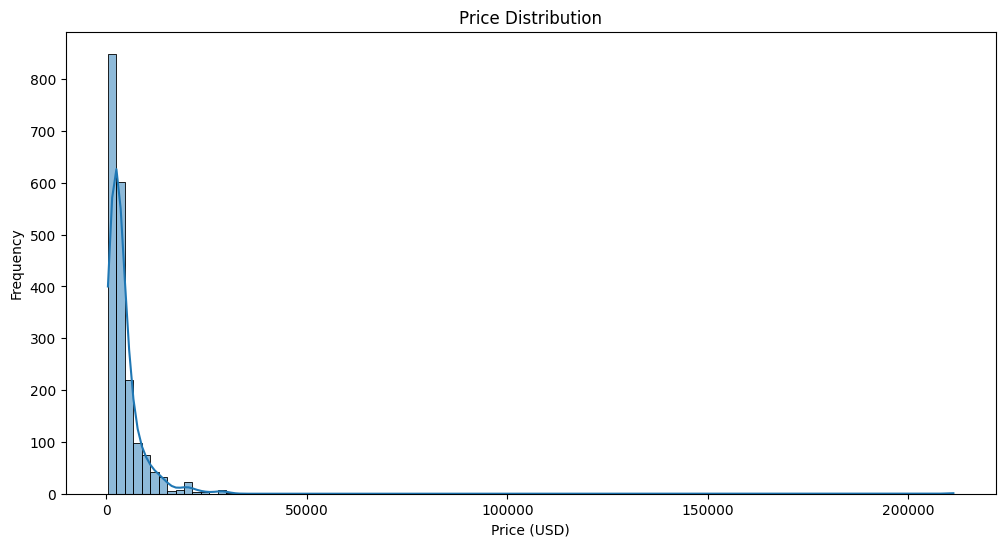

In [14]:
#price prediction
plt.figure(figsize=(12, 6))
sns.histplot(df['price'], bins=100, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
#plt.xlim(0, 1000)  # Adjust the x-axis limit if needed
plt.show()

In [15]:
df.bedroom.value_counts()

bedroom
1     1039
2      526
3      225
0       64
4       61
5       36
6       10
10       6
8        2
7        2
Name: count, dtype: int64

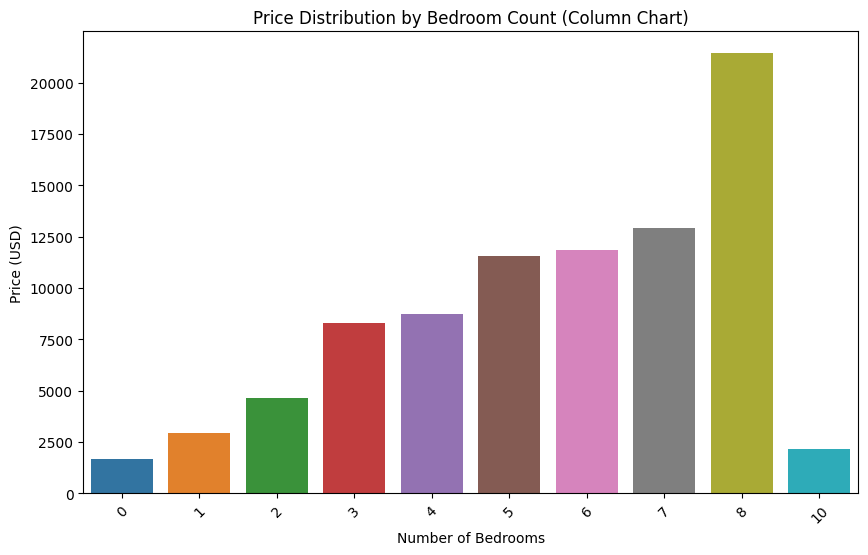

In [16]:
#Price Distribution by Room type
plt.figure(figsize=(10, 6))
sns.barplot(x='bedroom', y='price', data=df, errorbar=None)
plt.title('Price Distribution by Bedroom Count (Column Chart)')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45)
#plt.ylim(0, 500)  # Adjust the y-axis limit if needed
plt.show()



In [17]:
df.bed.value_counts().head()

bed
1    700
2    595
3    309
4    157
5     64
Name: count, dtype: int64

Text(0, 0.5, 'Count')

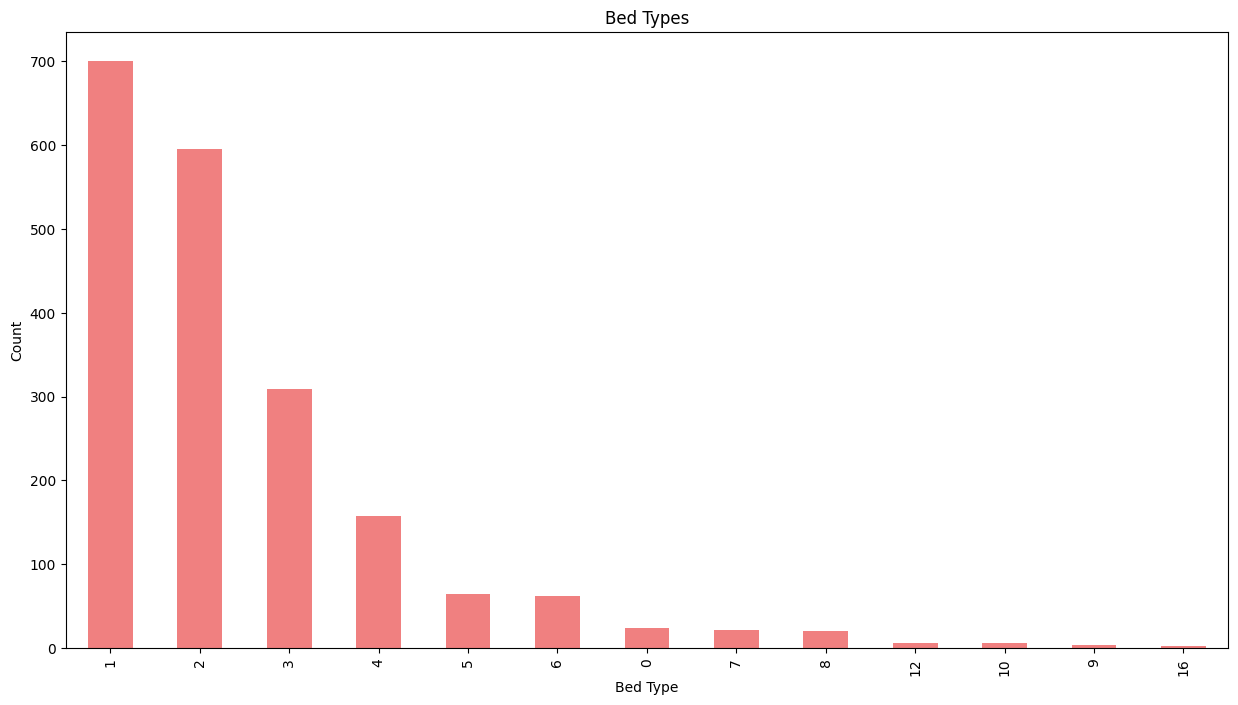

In [18]:
#Bar chart for bed types
plt.figure(figsize=(15,8))
bed_counts = df['bed'].value_counts()
bed_counts.plot(kind='bar', color='lightcoral')
plt.title('Bed Types')
plt.xlabel('Bed Type')
plt.ylabel('Count')

In [19]:
df.review.value_counts().head(5)

review
5.00    342
0.00    228
4.80     72
4.90     72
4.83     71
Name: count, dtype: int64

Text(0, 0.5, 'Count')

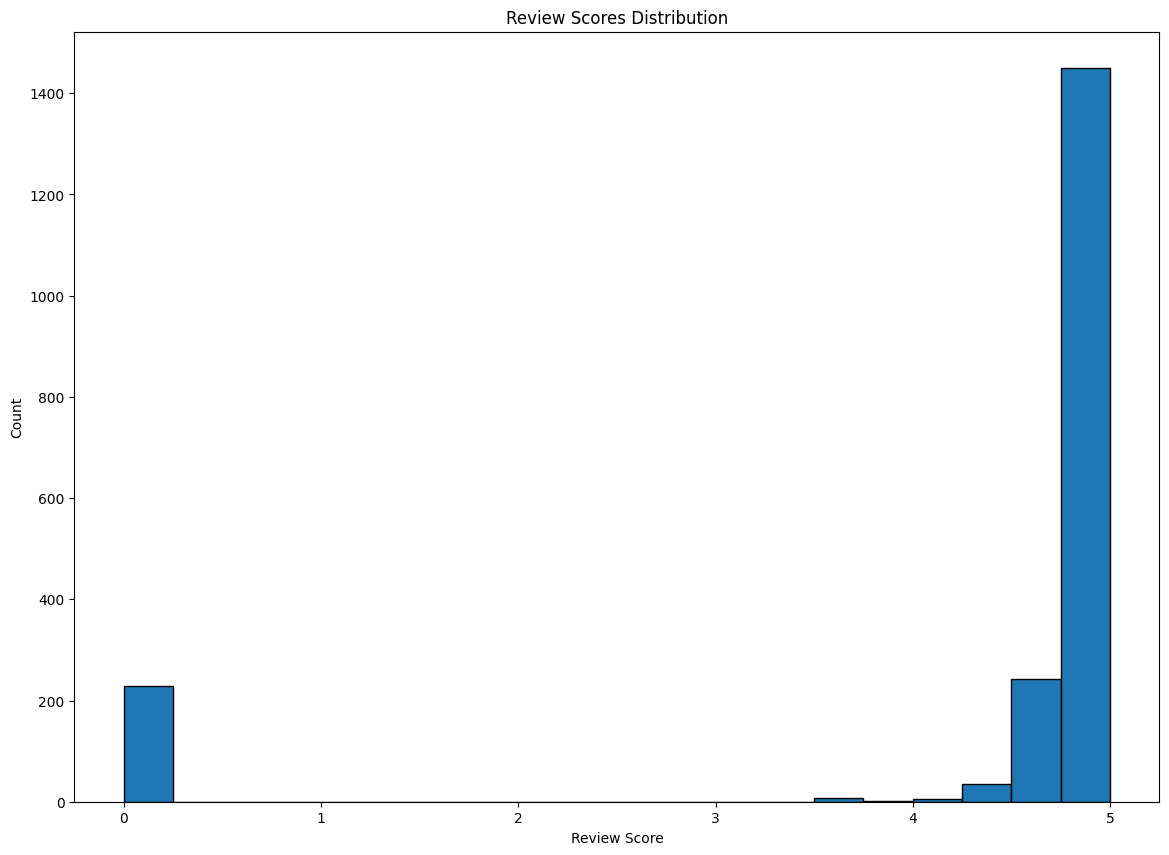

In [20]:
#Create a figure for the visualizations
plt.figure(figsize=(14, 10))
plt.hist(df['review'], bins=20, edgecolor='k')
plt.title('Review Scores Distribution')
plt.xlabel('Review Score')
plt.ylabel('Count')

Text(0, 0.5, 'Price')

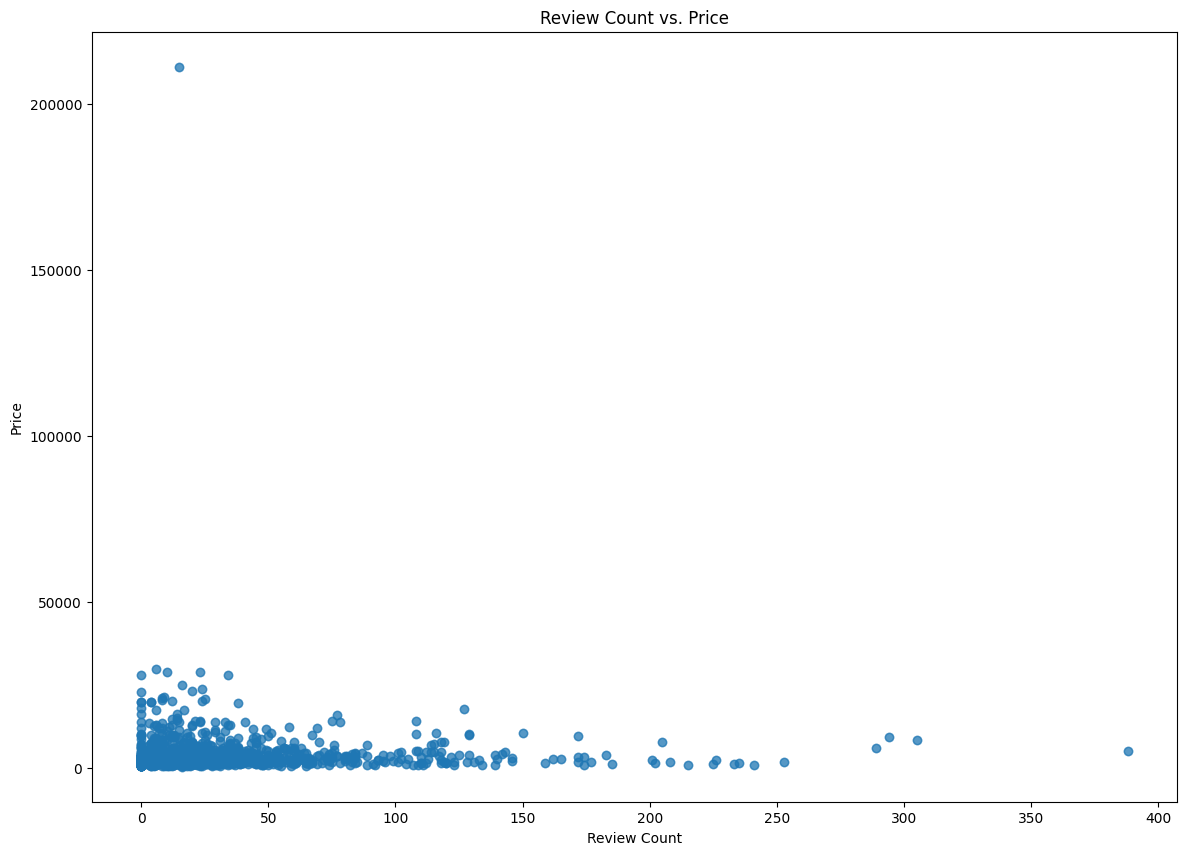

In [21]:
#Scatter plot of Review Count vs. Price
plt.figure(figsize=(14, 10))
plt.scatter(df['review_count'], df['price'], alpha=0.5)
plt.title('Review Count vs. Price')
plt.xlabel('Review Count')
plt.ylabel('Price')


In [22]:
df.guest.value_counts().head()

guest
2    533
4    377
3    321
6    259
5    132
Name: count, dtype: int64

Text(0, 0.5, 'Count')

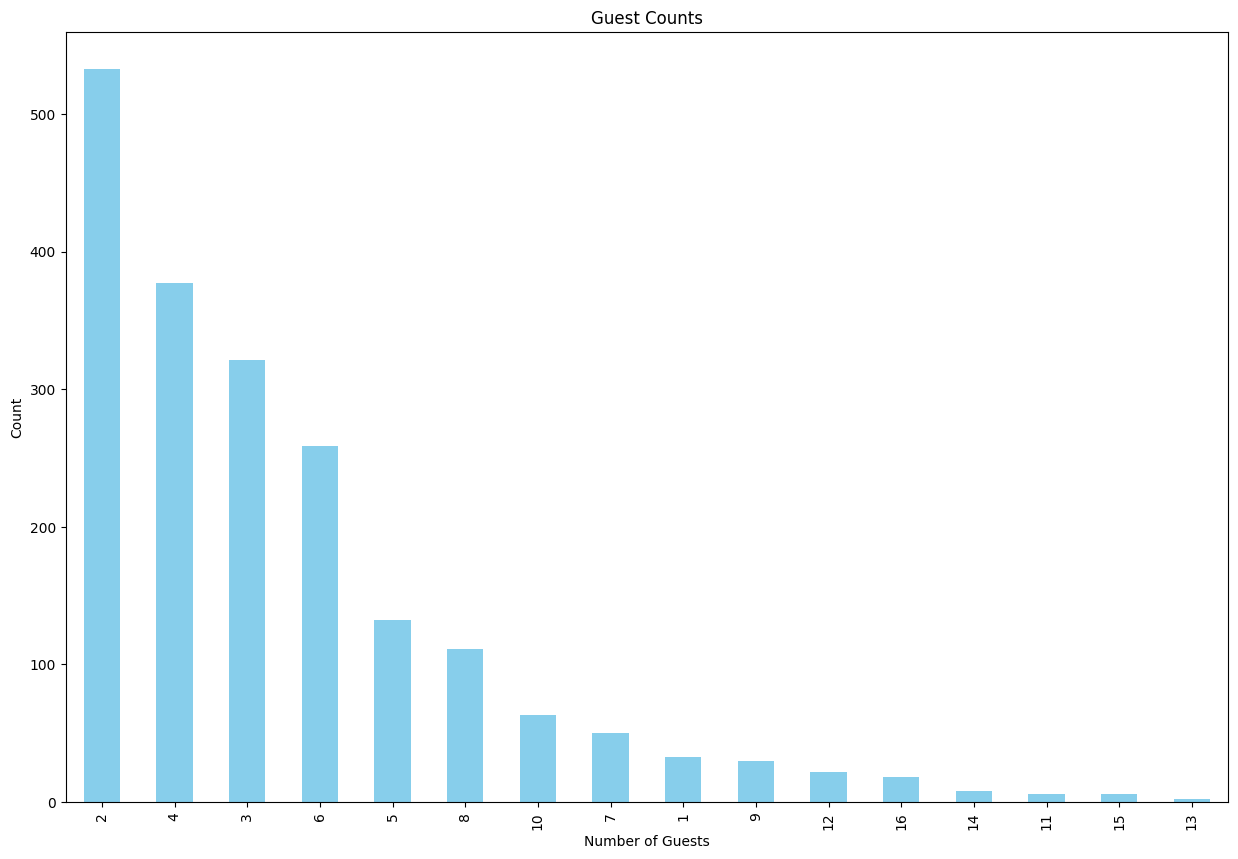

In [23]:
#Bar chart for guest counts
plt.figure(figsize=(15,10))
guest_counts = df['guest'].value_counts()
guest_counts.plot(kind='bar', color='skyblue')
plt.title('Guest Counts')
plt.xlabel('Number of Guests')
plt.ylabel('Count')

Text(0, 0.5, 'Price')

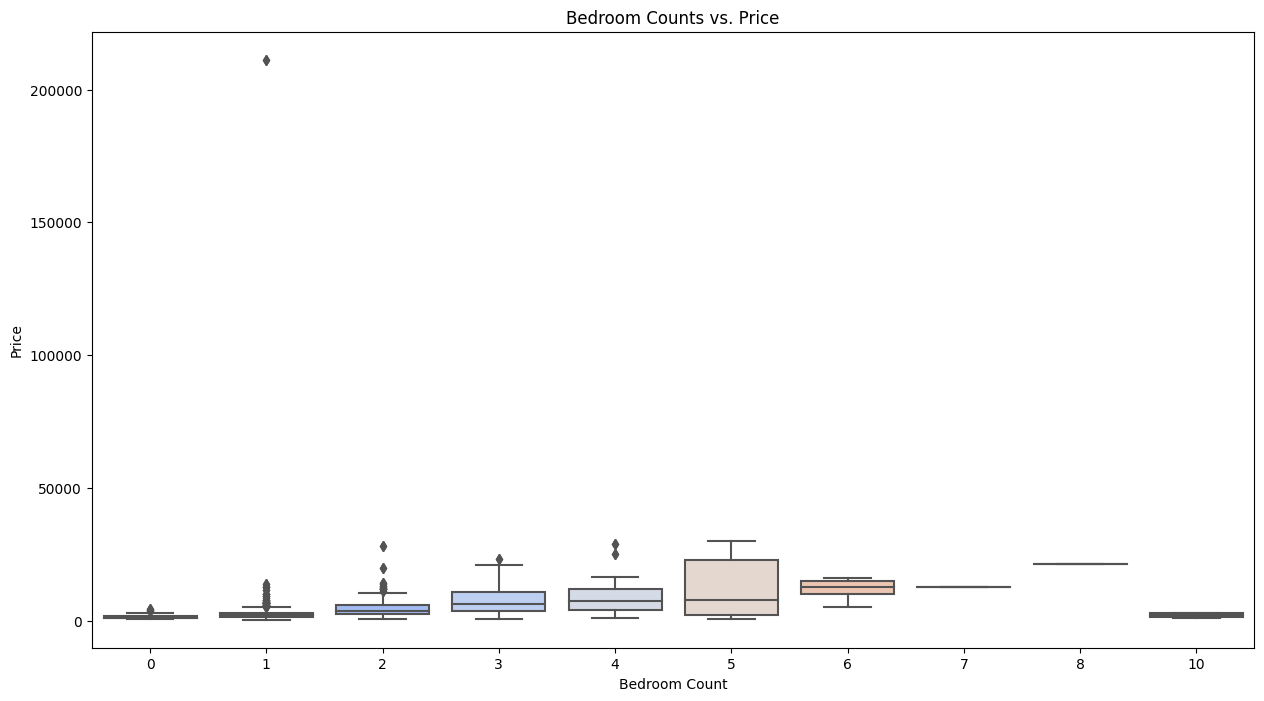

In [24]:
# create a visualization for bedroom counts vs price
plt.figure(figsize=(15,8))
sns.boxplot(data=df, x='bedroom', y='price', palette='coolwarm')
plt.title('Bedroom Counts vs. Price')
plt.xlabel('Bedroom Count')
plt.ylabel('Price')


In [25]:
df.private_bathroom.value_counts()

private_bathroom
0    1591
1     380
Name: count, dtype: int64

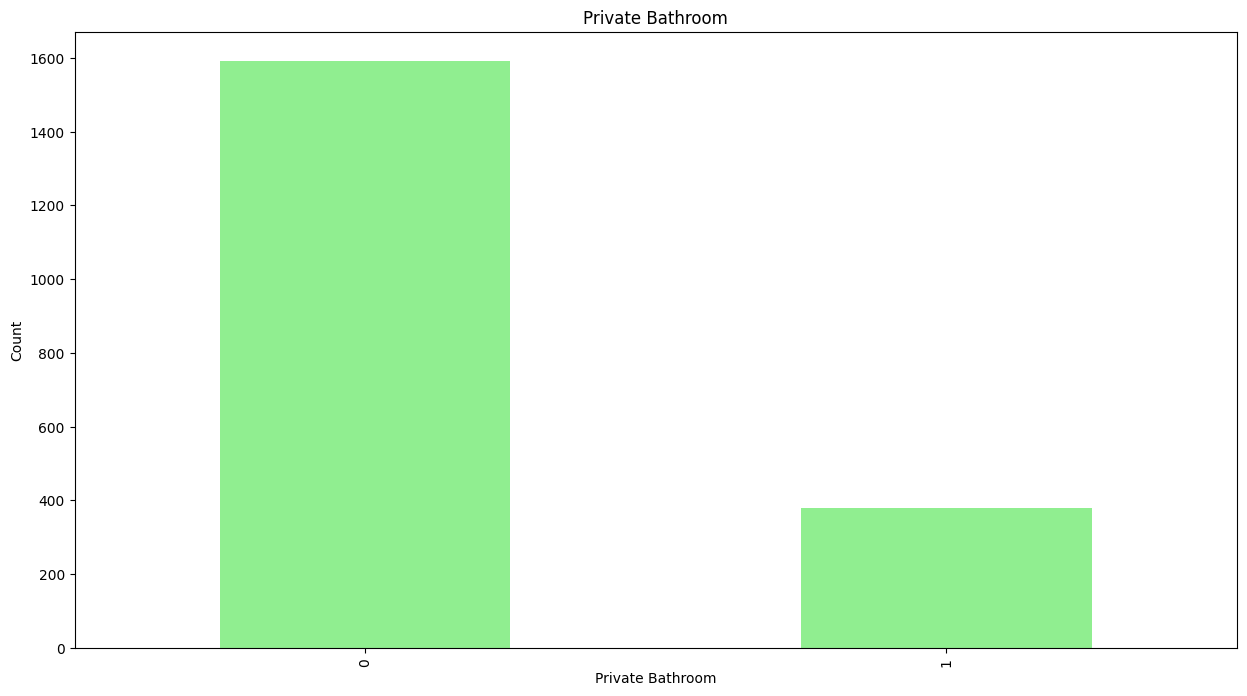

In [26]:
# Bar chart of Private Bathroom
plt.figure(figsize=(15,8))
private_bathroom_counts = df['private_bathroom'].value_counts()
private_bathroom_counts.plot(kind='bar', color='lightgreen')
plt.title('Private Bathroom')
plt.xlabel('Private Bathroom')
plt.ylabel('Count')
plt.show()

Text(0, 0.5, 'Count')

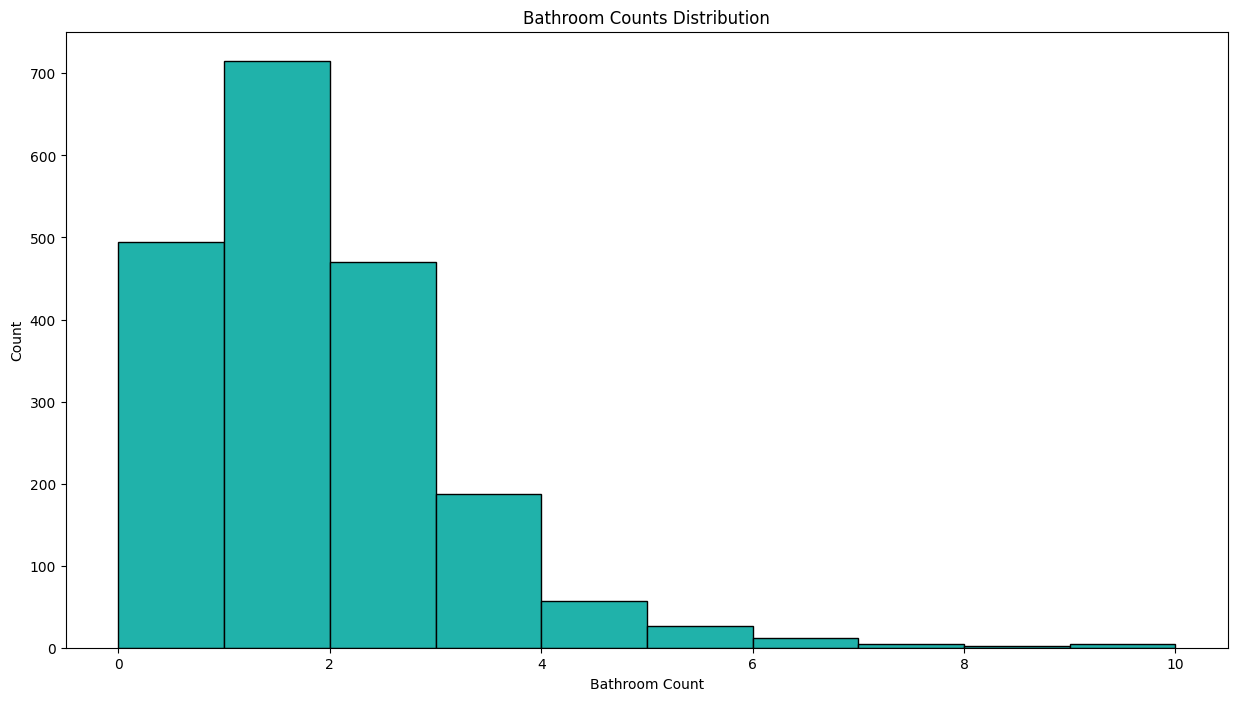

In [27]:
 # Histogram of Bathroom Counts
plt.figure(figsize=(15,8))

plt.hist(df['bathroom'], bins=10, edgecolor='k', color='lightseagreen')
plt.title('Bathroom Counts Distribution')
plt.xlabel('Bathroom Count')
plt.ylabel('Count')




1. **Review Scores Distribution**:
   - The distribution of review scores shows that most listings have high review scores, indicating overall guest satisfaction.

2. **Review Count vs. Price**:
   - There is a positive relationship between the number of reviews and the price of listings. Listings with more reviews tend to have higher prices.

3. **Guest Counts**:
   - The majority of listings accommodate a small number of guests, with 1-4 guests being the most common group.

4. **Bedroom Counts vs. Price**:
   - Listings with more bedrooms generally have higher prices, as seen in the box plot. However, there is some variation in prices within each bedroom count category.

5. **Bed Types**:
   - Most listings offer a standard bed type, followed by sofa beds and other types. Standard beds are the most common.

6. **Private Bathroom**:
   - Listings with private bathrooms are more common than shared bathrooms. Guests may prefer listings with private bathrooms.

7. **Bathroom Counts Distribution**:
   - The distribution of bathroom counts shows that most listings have 1-2 bathrooms, with 1 bathroom being the most common.

8. **Price vs. Review Scores**:
   - There is no strong linear relationship between price and review scores. Listings with a wide range of prices can have both high and low review scores.

9. **Price Distribution**:
   - The distribution of prices indicates that the majority of listings have prices below a certain threshold, with a few outliers having much higher prices.



# THANK YOU